In [21]:
import os
import sys
import warnings

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from tqdm import tqdm

from keras.datasets import mnist

from sklearn.manifold import TSNE

In [22]:
sys.path.append(os.path.abspath(os.path.join('..')))

In [23]:
from NeuralNetwork.Network import Network
from NeuralNetwork.Layers.Input import Input
from NeuralNetwork.Layers.Dense import Dense
from NeuralNetwork.Layers.Conv2D import Conv2D
from NeuralNetwork.Layers.Flatten import Flatten
from NeuralNetwork.Layers.MaxPool2D import MaxPool2D
from NeuralNetwork.Layers.SoftMax import SoftMax
from NeuralNetwork.Losses.MSE import MSE
from NeuralNetwork.Activations.ReLU import ReLU
from NeuralNetwork.Activations.Sigmoid import Sigmoid
from NeuralNetwork.Activations.Tanh import Tanh
from NeuralNetwork.Metrics import Metric, Plot

In [24]:
warnings.simplefilter(action='ignore', category=FutureWarning)

In [25]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Предобработка данных

## Загрузка данных

In [26]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

## Баланс классов

<function matplotlib.pyplot.show(close=None, block=None)>

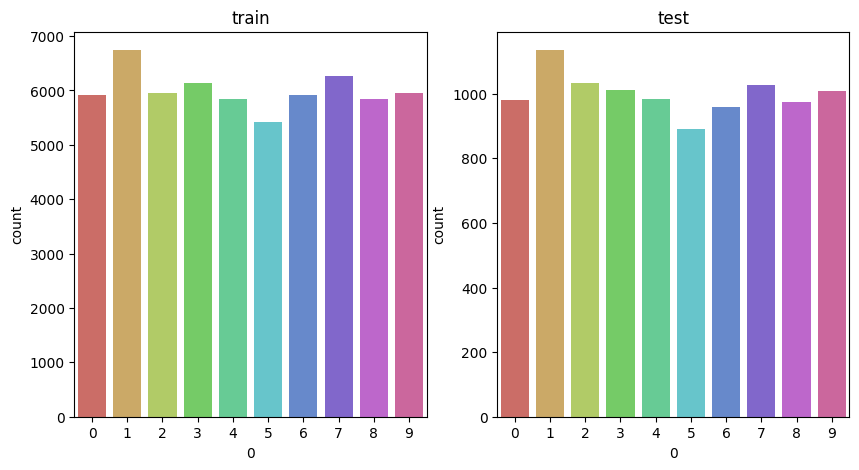

In [27]:
f, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.countplot(x=0, data=pd.DataFrame(y_train), palette='hls', ax=ax[0])
ax[0].set_title('train')
sns.countplot(x=0, data=pd.DataFrame(y_test), palette='hls', ax=ax[1])
ax[1].set_title('test')
plt.show

## Нормализация

In [28]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

## t-SNE

In [29]:
data = []
for i in tqdm(range(len(x_test))):
    data.append(np.ravel(x_test[i]).tolist())
flatt_df = pd.DataFrame(data)

100%|██████████| 10000/10000 [00:00<00:00, 38168.14it/s]


In [30]:
tsne = TSNE(random_state=42, init='pca', n_iter=300).fit_transform(flatt_df)

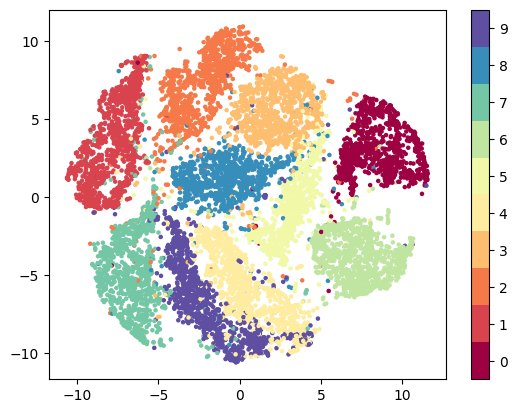

In [31]:
plt.scatter(tsne[:, 0], tsne[:, 1], s=5, c=y_test, cmap='Spectral')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))

## Категориальные признаки

In [32]:
y_train = pd.get_dummies(pd.DataFrame(y_train)[0]).to_numpy()
y_test = pd.get_dummies(pd.DataFrame(y_test)[0]).to_numpy()

In [33]:
x_train = x_train.reshape(60000, 1, 28, 28)
x_test = x_test.reshape(10000, 1, 28, 28)

In [34]:
print(f"Train dataset shape: {x_train.shape}, {y_train.shape}")
print(f"Test dataset shape:  {x_test.shape}, {y_test.shape}")

Train dataset shape: (60000, 1, 28, 28), (60000, 10)
Test dataset shape:  (10000, 1, 28, 28), (10000, 10)


# Решение

In [35]:
model = Network() 

model.add(Input((1, 28, 28)))
model.add(Conv2D(5, (3, 3), activation=Tanh))
model.add(Flatten())
model.add(Dense(100, activation=Tanh))
model.add(Dense(10, activation=Sigmoid))

model.compile(loss=MSE)
model.fit(X_train=x_train[:1000], Y_train=y_train[:1000], epochs=150, learning_rate=1.5) 
y_pred = model.predict(X=x_test)

Compilation...


100%|██████████| 4/4 [00:00<00:00, 443.98it/s]


Learning...


100%|██████████| 1000/1000 [00:03<00:00, 259.33it/s]


Epoch 1/150: loss=0.10713671558348646


100%|██████████| 1000/1000 [00:03<00:00, 260.06it/s]


Epoch 2/150: loss=0.08891030565708022


100%|██████████| 1000/1000 [00:03<00:00, 262.88it/s]


Epoch 3/150: loss=0.0853148494380356


100%|██████████| 1000/1000 [00:03<00:00, 261.38it/s]


Epoch 4/150: loss=0.08144490946102029


100%|██████████| 1000/1000 [00:03<00:00, 252.23it/s]


Epoch 5/150: loss=0.07517581256455313


100%|██████████| 1000/1000 [00:03<00:00, 262.33it/s]


Epoch 6/150: loss=0.07140576568023738


100%|██████████| 1000/1000 [00:03<00:00, 259.13it/s]


Epoch 7/150: loss=0.06925425257894696


100%|██████████| 1000/1000 [00:03<00:00, 257.20it/s]


Epoch 8/150: loss=0.06670258084573952


100%|██████████| 1000/1000 [00:03<00:00, 260.76it/s]


Epoch 9/150: loss=0.06501993601175188


100%|██████████| 1000/1000 [00:03<00:00, 259.87it/s]


Epoch 10/150: loss=0.06416465948775059


100%|██████████| 1000/1000 [00:03<00:00, 255.98it/s]


Epoch 11/150: loss=0.06339370352440628


100%|██████████| 1000/1000 [00:03<00:00, 258.65it/s]


Epoch 12/150: loss=0.06253894438191632


100%|██████████| 1000/1000 [00:03<00:00, 259.48it/s]


Epoch 13/150: loss=0.06243884911785414


100%|██████████| 1000/1000 [00:03<00:00, 260.20it/s]


Epoch 14/150: loss=0.0620742884037841


100%|██████████| 1000/1000 [00:03<00:00, 257.87it/s]


Epoch 15/150: loss=0.06138834349290616


100%|██████████| 1000/1000 [00:03<00:00, 250.86it/s]


Epoch 16/150: loss=0.06075970114837698


100%|██████████| 1000/1000 [00:03<00:00, 258.38it/s]


Epoch 17/150: loss=0.05992397875007313


100%|██████████| 1000/1000 [00:03<00:00, 259.83it/s]


Epoch 18/150: loss=0.0595695289379815


100%|██████████| 1000/1000 [00:03<00:00, 263.58it/s]


Epoch 19/150: loss=0.059073721922335655


100%|██████████| 1000/1000 [00:03<00:00, 256.08it/s]


Epoch 20/150: loss=0.058899324534886624


100%|██████████| 1000/1000 [00:03<00:00, 258.01it/s]


Epoch 21/150: loss=0.05861309719935221


100%|██████████| 1000/1000 [00:03<00:00, 257.33it/s]


Epoch 22/150: loss=0.05842077303746214


100%|██████████| 1000/1000 [00:03<00:00, 259.75it/s]


Epoch 23/150: loss=0.05873930807378112


100%|██████████| 1000/1000 [00:03<00:00, 260.40it/s]


Epoch 24/150: loss=0.058279764894371006


100%|██████████| 1000/1000 [00:03<00:00, 259.19it/s]


Epoch 25/150: loss=0.057833647929555185


100%|██████████| 1000/1000 [00:03<00:00, 262.99it/s]


Epoch 26/150: loss=0.05750904825844776


100%|██████████| 1000/1000 [00:03<00:00, 259.70it/s]


Epoch 27/150: loss=0.05712921569536806


100%|██████████| 1000/1000 [00:03<00:00, 261.25it/s]


Epoch 28/150: loss=0.05692310128118633


100%|██████████| 1000/1000 [00:03<00:00, 260.40it/s]


Epoch 29/150: loss=0.05663325467968307


100%|██████████| 1000/1000 [00:03<00:00, 260.01it/s]


Epoch 30/150: loss=0.056244451810421425


100%|██████████| 1000/1000 [00:03<00:00, 256.47it/s]


Epoch 31/150: loss=0.056036395244477955


100%|██████████| 1000/1000 [00:03<00:00, 257.25it/s]


Epoch 32/150: loss=0.05580828303928103


100%|██████████| 1000/1000 [00:03<00:00, 259.36it/s]


Epoch 33/150: loss=0.055645673747613776


100%|██████████| 1000/1000 [00:03<00:00, 260.38it/s]


Epoch 34/150: loss=0.05533720455599148


100%|██████████| 1000/1000 [00:03<00:00, 259.39it/s]


Epoch 35/150: loss=0.05434417528224331


100%|██████████| 1000/1000 [00:03<00:00, 260.90it/s]


Epoch 36/150: loss=0.05220400988264326


100%|██████████| 1000/1000 [00:03<00:00, 258.69it/s]


Epoch 37/150: loss=0.05101879425052077


100%|██████████| 1000/1000 [00:03<00:00, 260.44it/s]


Epoch 38/150: loss=0.04946445258934761


100%|██████████| 1000/1000 [00:03<00:00, 260.04it/s]


Epoch 39/150: loss=0.049995316776068555


100%|██████████| 1000/1000 [00:03<00:00, 262.36it/s]


Epoch 40/150: loss=0.0507352058058112


100%|██████████| 1000/1000 [00:03<00:00, 259.67it/s]


Epoch 41/150: loss=0.05005501019893763


100%|██████████| 1000/1000 [00:03<00:00, 259.70it/s]


Epoch 42/150: loss=0.04928661421530839


100%|██████████| 1000/1000 [00:03<00:00, 260.05it/s]


Epoch 43/150: loss=0.0486109275295896


100%|██████████| 1000/1000 [00:03<00:00, 263.26it/s]


Epoch 44/150: loss=0.048227021129036964


100%|██████████| 1000/1000 [00:03<00:00, 262.06it/s]


Epoch 45/150: loss=0.047848972649561304


100%|██████████| 1000/1000 [00:03<00:00, 264.14it/s]


Epoch 46/150: loss=0.04745963360289823


100%|██████████| 1000/1000 [00:03<00:00, 264.30it/s]


Epoch 47/150: loss=0.049659771691108016


100%|██████████| 1000/1000 [00:03<00:00, 263.85it/s]


Epoch 48/150: loss=0.04893674838367033


100%|██████████| 1000/1000 [00:03<00:00, 260.90it/s]


Epoch 49/150: loss=0.048127864559735695


100%|██████████| 1000/1000 [00:03<00:00, 260.50it/s]


Epoch 50/150: loss=0.0477993634145095


100%|██████████| 1000/1000 [00:03<00:00, 261.74it/s]


Epoch 51/150: loss=0.047372998142949305


100%|██████████| 1000/1000 [00:03<00:00, 261.78it/s]


Epoch 52/150: loss=0.04691628758224665


100%|██████████| 1000/1000 [00:03<00:00, 259.76it/s]


Epoch 53/150: loss=0.046735393548012774


100%|██████████| 1000/1000 [00:03<00:00, 263.57it/s]


Epoch 54/150: loss=0.04624039324974633


100%|██████████| 1000/1000 [00:03<00:00, 259.85it/s]


Epoch 55/150: loss=0.04587726723807953


100%|██████████| 1000/1000 [00:03<00:00, 261.64it/s]


Epoch 56/150: loss=0.0455427179718002


100%|██████████| 1000/1000 [00:03<00:00, 260.56it/s]


Epoch 57/150: loss=0.04528484208881898


100%|██████████| 1000/1000 [00:04<00:00, 246.54it/s]


Epoch 58/150: loss=0.04513227053027009


100%|██████████| 1000/1000 [00:03<00:00, 254.40it/s]


Epoch 59/150: loss=0.04495106700822112


100%|██████████| 1000/1000 [00:03<00:00, 255.32it/s]


Epoch 60/150: loss=0.044773378889084746


100%|██████████| 1000/1000 [00:03<00:00, 260.30it/s]


Epoch 61/150: loss=0.04477786763883645


100%|██████████| 1000/1000 [00:03<00:00, 257.53it/s]


Epoch 62/150: loss=0.0445883914318073


100%|██████████| 1000/1000 [00:03<00:00, 258.02it/s]


Epoch 63/150: loss=0.044419324626022244


100%|██████████| 1000/1000 [00:03<00:00, 256.93it/s]


Epoch 64/150: loss=0.04434761696564189


100%|██████████| 1000/1000 [00:03<00:00, 260.47it/s]


Epoch 65/150: loss=0.04426381599151322


100%|██████████| 1000/1000 [00:03<00:00, 260.80it/s]


Epoch 66/150: loss=0.04417204213093049


100%|██████████| 1000/1000 [00:03<00:00, 261.45it/s]


Epoch 67/150: loss=0.04410440125592044


100%|██████████| 1000/1000 [00:03<00:00, 263.77it/s]


Epoch 68/150: loss=0.04399081922838991


100%|██████████| 1000/1000 [00:03<00:00, 260.85it/s]


Epoch 69/150: loss=0.043832258297507906


100%|██████████| 1000/1000 [00:03<00:00, 263.81it/s]


Epoch 70/150: loss=0.043673375329465684


100%|██████████| 1000/1000 [00:03<00:00, 259.43it/s]


Epoch 71/150: loss=0.04352651013890119


100%|██████████| 1000/1000 [00:03<00:00, 261.71it/s]


Epoch 72/150: loss=0.04340251753139768


100%|██████████| 1000/1000 [00:03<00:00, 260.70it/s]


Epoch 73/150: loss=0.04332298754432978


100%|██████████| 1000/1000 [00:03<00:00, 259.65it/s]


Epoch 74/150: loss=0.04326097986854168


100%|██████████| 1000/1000 [00:03<00:00, 258.00it/s]


Epoch 75/150: loss=0.04323125665058327


100%|██████████| 1000/1000 [00:03<00:00, 260.24it/s]


Epoch 76/150: loss=0.04319703239861116


100%|██████████| 1000/1000 [00:03<00:00, 259.04it/s]


Epoch 77/150: loss=0.04313335662859567


100%|██████████| 1000/1000 [00:03<00:00, 259.97it/s]


Epoch 78/150: loss=0.0430924168582827


100%|██████████| 1000/1000 [00:03<00:00, 262.18it/s]


Epoch 79/150: loss=0.04293220316751571


100%|██████████| 1000/1000 [00:03<00:00, 257.70it/s]


Epoch 80/150: loss=0.0427438269842219


100%|██████████| 1000/1000 [00:03<00:00, 260.74it/s]


Epoch 81/150: loss=0.04255445647642905


100%|██████████| 1000/1000 [00:03<00:00, 260.99it/s]


Epoch 82/150: loss=0.04247583790030577


100%|██████████| 1000/1000 [00:03<00:00, 257.72it/s]


Epoch 83/150: loss=0.04238618470662938


100%|██████████| 1000/1000 [00:03<00:00, 258.41it/s]


Epoch 84/150: loss=0.042304279386541715


100%|██████████| 1000/1000 [00:03<00:00, 260.41it/s]


Epoch 85/150: loss=0.042231575211360485


100%|██████████| 1000/1000 [00:03<00:00, 259.75it/s]


Epoch 86/150: loss=0.04218763440831419


100%|██████████| 1000/1000 [00:03<00:00, 262.92it/s]


Epoch 87/150: loss=0.042160634379792644


100%|██████████| 1000/1000 [00:03<00:00, 259.79it/s]


Epoch 88/150: loss=0.04213248524765746


100%|██████████| 1000/1000 [00:03<00:00, 258.12it/s]


Epoch 89/150: loss=0.042112784723121806


100%|██████████| 1000/1000 [00:03<00:00, 259.31it/s]


Epoch 90/150: loss=0.04205399018710467


100%|██████████| 1000/1000 [00:03<00:00, 261.07it/s]


Epoch 91/150: loss=0.04199161681774038


100%|██████████| 1000/1000 [00:03<00:00, 260.57it/s]


Epoch 92/150: loss=0.04193402042534101


100%|██████████| 1000/1000 [00:03<00:00, 257.84it/s]


Epoch 93/150: loss=0.04187598567455647


100%|██████████| 1000/1000 [00:03<00:00, 260.27it/s]


Epoch 94/150: loss=0.0418380980250434


100%|██████████| 1000/1000 [00:03<00:00, 260.77it/s]


Epoch 95/150: loss=0.04182155462901501


100%|██████████| 1000/1000 [00:03<00:00, 260.71it/s]


Epoch 96/150: loss=0.04181013009319156


100%|██████████| 1000/1000 [00:03<00:00, 259.83it/s]


Epoch 97/150: loss=0.04179919336001295


100%|██████████| 1000/1000 [00:03<00:00, 258.13it/s]


Epoch 98/150: loss=0.04178007361840968


100%|██████████| 1000/1000 [00:03<00:00, 255.42it/s]


Epoch 99/150: loss=0.04175073056909353


100%|██████████| 1000/1000 [00:03<00:00, 259.22it/s]


Epoch 100/150: loss=0.0417213438681481


100%|██████████| 1000/1000 [00:03<00:00, 256.34it/s]


Epoch 101/150: loss=0.041694725662791095


100%|██████████| 1000/1000 [00:03<00:00, 259.66it/s]


Epoch 102/150: loss=0.04167021748543239


100%|██████████| 1000/1000 [00:03<00:00, 260.45it/s]


Epoch 103/150: loss=0.041646881952048846


100%|██████████| 1000/1000 [00:03<00:00, 259.51it/s]


Epoch 104/150: loss=0.04162369048161948


100%|██████████| 1000/1000 [00:03<00:00, 259.62it/s]


Epoch 105/150: loss=0.04159932817328389


100%|██████████| 1000/1000 [00:03<00:00, 261.25it/s]


Epoch 106/150: loss=0.04157241063787504


100%|██████████| 1000/1000 [00:03<00:00, 260.60it/s]


Epoch 107/150: loss=0.041543282278882654


100%|██████████| 1000/1000 [00:03<00:00, 259.15it/s]


Epoch 108/150: loss=0.041513320080887234


100%|██████████| 1000/1000 [00:03<00:00, 260.09it/s]


Epoch 109/150: loss=0.04148236775279771


100%|██████████| 1000/1000 [00:03<00:00, 261.01it/s]


Epoch 110/150: loss=0.04145436129457521


100%|██████████| 1000/1000 [00:03<00:00, 262.35it/s]


Epoch 111/150: loss=0.04144256670261905


100%|██████████| 1000/1000 [00:03<00:00, 259.72it/s]


Epoch 112/150: loss=0.04142120136754701


100%|██████████| 1000/1000 [00:03<00:00, 253.77it/s]


Epoch 113/150: loss=0.04135367717472366


100%|██████████| 1000/1000 [00:03<00:00, 259.26it/s]


Epoch 114/150: loss=0.04130410309637944


100%|██████████| 1000/1000 [00:03<00:00, 261.00it/s]


Epoch 115/150: loss=0.041284205808360085


100%|██████████| 1000/1000 [00:03<00:00, 263.25it/s]


Epoch 116/150: loss=0.04129531446745169


100%|██████████| 1000/1000 [00:03<00:00, 261.36it/s]


Epoch 117/150: loss=0.04128404383128696


100%|██████████| 1000/1000 [00:03<00:00, 263.63it/s]


Epoch 118/150: loss=0.04118342225141616


100%|██████████| 1000/1000 [00:03<00:00, 261.23it/s]


Epoch 119/150: loss=0.041118541604130296


100%|██████████| 1000/1000 [00:03<00:00, 261.79it/s]


Epoch 120/150: loss=0.04106058370898584


100%|██████████| 1000/1000 [00:03<00:00, 262.16it/s]


Epoch 121/150: loss=0.04101024639498414


100%|██████████| 1000/1000 [00:03<00:00, 263.41it/s]


Epoch 122/150: loss=0.04098510556993189


100%|██████████| 1000/1000 [00:03<00:00, 261.18it/s]


Epoch 123/150: loss=0.04096118654478546


100%|██████████| 1000/1000 [00:03<00:00, 259.92it/s]


Epoch 124/150: loss=0.04093735264600341


100%|██████████| 1000/1000 [00:03<00:00, 259.86it/s]


Epoch 125/150: loss=0.040914688136344836


100%|██████████| 1000/1000 [00:03<00:00, 264.06it/s]


Epoch 126/150: loss=0.04089304785299632


100%|██████████| 1000/1000 [00:03<00:00, 260.74it/s]


Epoch 127/150: loss=0.040875470409171034


100%|██████████| 1000/1000 [00:03<00:00, 262.57it/s]


Epoch 128/150: loss=0.04086181962947766


100%|██████████| 1000/1000 [00:03<00:00, 259.10it/s]


Epoch 129/150: loss=0.040845084116446606


100%|██████████| 1000/1000 [00:03<00:00, 260.20it/s]


Epoch 130/150: loss=0.04074585788991175


100%|██████████| 1000/1000 [00:03<00:00, 259.77it/s]


Epoch 131/150: loss=0.04064706141802432


100%|██████████| 1000/1000 [00:03<00:00, 259.96it/s]


Epoch 132/150: loss=0.04059498603634666


100%|██████████| 1000/1000 [00:03<00:00, 262.42it/s]


Epoch 133/150: loss=0.04056241900896867


100%|██████████| 1000/1000 [00:03<00:00, 260.86it/s]


Epoch 134/150: loss=0.040537963674670933


100%|██████████| 1000/1000 [00:03<00:00, 259.24it/s]


Epoch 135/150: loss=0.04051925611842279


100%|██████████| 1000/1000 [00:03<00:00, 259.76it/s]


Epoch 136/150: loss=0.04050426447015613


100%|██████████| 1000/1000 [00:03<00:00, 259.94it/s]


Epoch 137/150: loss=0.04049009652765283


100%|██████████| 1000/1000 [00:03<00:00, 260.30it/s]


Epoch 138/150: loss=0.04047126389763517


100%|██████████| 1000/1000 [00:03<00:00, 259.90it/s]


Epoch 139/150: loss=0.0404511887096944


100%|██████████| 1000/1000 [00:03<00:00, 258.02it/s]


Epoch 140/150: loss=0.04043025379775487


100%|██████████| 1000/1000 [00:03<00:00, 264.10it/s]


Epoch 141/150: loss=0.04040756998955381


100%|██████████| 1000/1000 [00:03<00:00, 260.72it/s]


Epoch 142/150: loss=0.04038623149236241


100%|██████████| 1000/1000 [00:03<00:00, 259.03it/s]


Epoch 143/150: loss=0.04037028370427125


100%|██████████| 1000/1000 [00:03<00:00, 260.50it/s]


Epoch 144/150: loss=0.04035685877214371


100%|██████████| 1000/1000 [00:03<00:00, 261.75it/s]


Epoch 145/150: loss=0.04034489936499988


100%|██████████| 1000/1000 [00:03<00:00, 262.76it/s]


Epoch 146/150: loss=0.04033401699622427


100%|██████████| 1000/1000 [00:03<00:00, 262.64it/s]


Epoch 147/150: loss=0.04032407843277884


100%|██████████| 1000/1000 [00:03<00:00, 262.35it/s]


Epoch 148/150: loss=0.04031502377421639


100%|██████████| 1000/1000 [00:03<00:00, 264.23it/s]


Epoch 149/150: loss=0.040306806123697275


100%|██████████| 1000/1000 [00:03<00:00, 263.47it/s]


Epoch 150/150: loss=0.040299335977038254
Prediction...


100%|██████████| 10000/10000 [00:03<00:00, 2992.60it/s]


In [36]:
pred = list()
true = list() 
for i in tqdm(range(len(y_pred))): 
    pred.append(np.argmax(y_pred[i]))
    true.append(np.argmax(y_test[i]))

100%|██████████| 10000/10000 [00:00<00:00, 156253.18it/s]


# Результаты

## История обучения

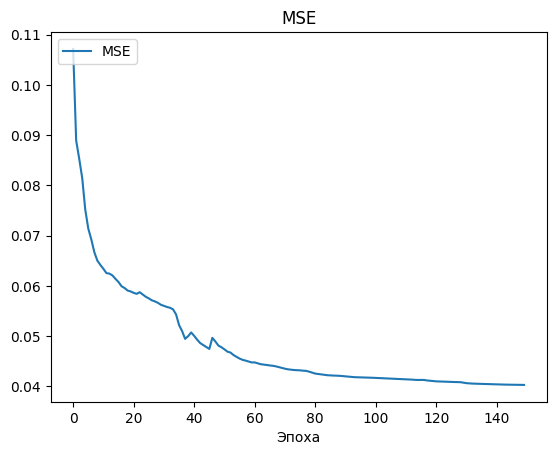

In [37]:
Plot.plot_history_trend(history=model.history, metric='MSE') 

## Метрики

In [38]:
Metric.print_classification_metrics(y_true=true, y_pred=pred)

                  7         2         1         0         4         9  \
Accuracy   0.544900  0.544900  0.544900  0.544900  0.544900  0.544900   
Precision  0.004222  0.165303  0.194345  0.159710  0.137518  0.142511   
Recall     0.014591  0.842054  0.956828  0.855102  0.689409  0.699703   
F1 score   0.006549  0.276356  0.323070  0.269150  0.229297  0.236794   

                  5         6         3         8  
Accuracy   0.544900  0.544900  0.544900  0.544900  
Precision  0.118775  0.134783  0.006687  0.000279  
Recall     0.639013  0.692067  0.023762  0.001027  
F1 score   0.200316  0.225625  0.010437  0.000439  


## Матрица ошибок

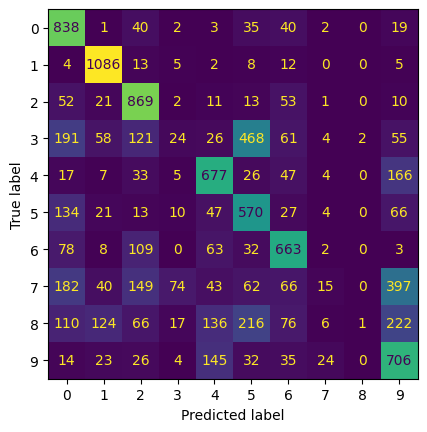

In [39]:
Plot.plot_confusion_matrix(y_true=true, y_pred=pred) 

## ROC-кривая

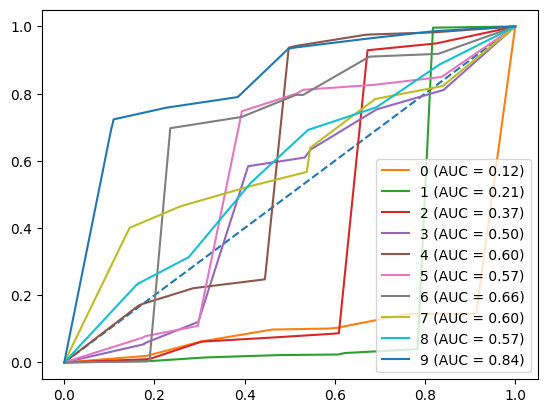

In [41]:
Plot.plot_roc_curve(y_true=true, y_pred=pred, labels=[0,1,2,3,4,5,6,7,8,9]) 